In [1]:
%run Reactive_Air_shock_2T_last.py

# Results

Here we presents the results ...

## 11 specie problem

As a first test case we compute the chemical relaxation post-shock at 60 Km of altitude with a free-stream velocity of $u_0 = 6Km/s$, which represents a typical velocity value for the reentry trajectory of space vehicles. The values of temperature and density are taken from the U.S. Standard Atmosphere Air Properties.
The composition of the gas in terms of mass fraction is assumed to be equal to $79\% N_2$ and $21\% O_2$. <br>
All the 11 species and the 47 reactions of Park's model [1] are considered. <br>
The solution is computed for both one-temperature and two-temperature mixture models, then the results are compared and analyzed.

In [2]:
_11specie = problem()

# Add species 
_11specie.add_specie_ic(O2, 0.21)
_11specie.add_specie_ic(N2, 0.79)
_11specie.add_specie_ic(NO,  0.0)
_11specie.add_specie_ic(N,  0)
_11specie.add_specie_ic(O,  0)
_11specie.add_specie_ic(O2p,  0.0)
_11specie.add_specie_ic(NOp,  0.0)
_11specie.add_specie_ic(N2p,  0.0)
_11specie.add_specie_ic(Np,  0.0)
_11specie.add_specie_ic(Op,  0.0)
_11specie.add_specie_ic(em,  0.0)

# Add reactions
_11specie.reaction.append(O2diss)
_11specie.reaction.append(N2diss)
_11specie.reaction.append(NOdiss)
_11specie.reaction.append(NO_O)
_11specie.reaction.append(O_N2)
_11specie.reaction.append(O_O2p)
_11specie.reaction.append(N2_Np)
_11specie.reaction.append(O_NOp )
_11specie.reaction.append(N2_Op)
_11specie.reaction.append(N_NOp)
_11specie.reaction.append(O2_NOp)
_11specie.reaction.append(NOp_N)
_11specie.reaction.append(O___N)
_11specie.reaction.append(O___O)
_11specie.reaction.append(N___N)
_11specie.reaction.append(O_ion)
_11specie.reaction.append(N_ion)

# Set ic
# _11specie.T0     = 300
# _11specie.rho0   = 10 / (287.05 * 300)
# _11specie.u0     = 10000

_11specie.T0     = 273.15 - 26.13 
_11specie.rho0   = 3.097e-4
_11specie.u0     = 6000

### 1 Temperature model

In [3]:
# Solve
_11specie.solve()
_11specie.postprocess()

Pre shock Mach : 18.977626837981823
******************************
Post-shock guess values:
rho    : 0.0018327556843828609
T      : 17531.821544944738
Speed  : 1013.883091911242
Mach   : 0.380654589983921
******************************
Post-shock values:
rho    : 0.002550900578885017
T      : 13315.518416899495
Tv     : 247.01999999999998
Speed  : 728.4486174730453
Mach   : 0.3385372185853052
******************************
Reference mean free path : 2.1592729644619046e-05



### 2 Temperature model

In [4]:
_11specie_2T = cp.deepcopy(_11specie)
_11specie_2T.solve_2T()
_11specie_2T.postprocess()

Pre shock Mach : 18.977626837981823
******************************
Post-shock guess values:
rho    : 0.0018327556843828609
T      : 17531.821544944738
Speed  : 1013.883091911242
Mach   : 0.380654589983921
******************************
Post-shock values:
rho    : 0.0018327556843828602
T      : 17531.82154494475
Tv     : 247.01999999999998
Speed  : 1013.8830919112426
Mach   : 0.4200041813142019
******************************
Reference mean free path : 2.1592729644619046e-05



### Plot

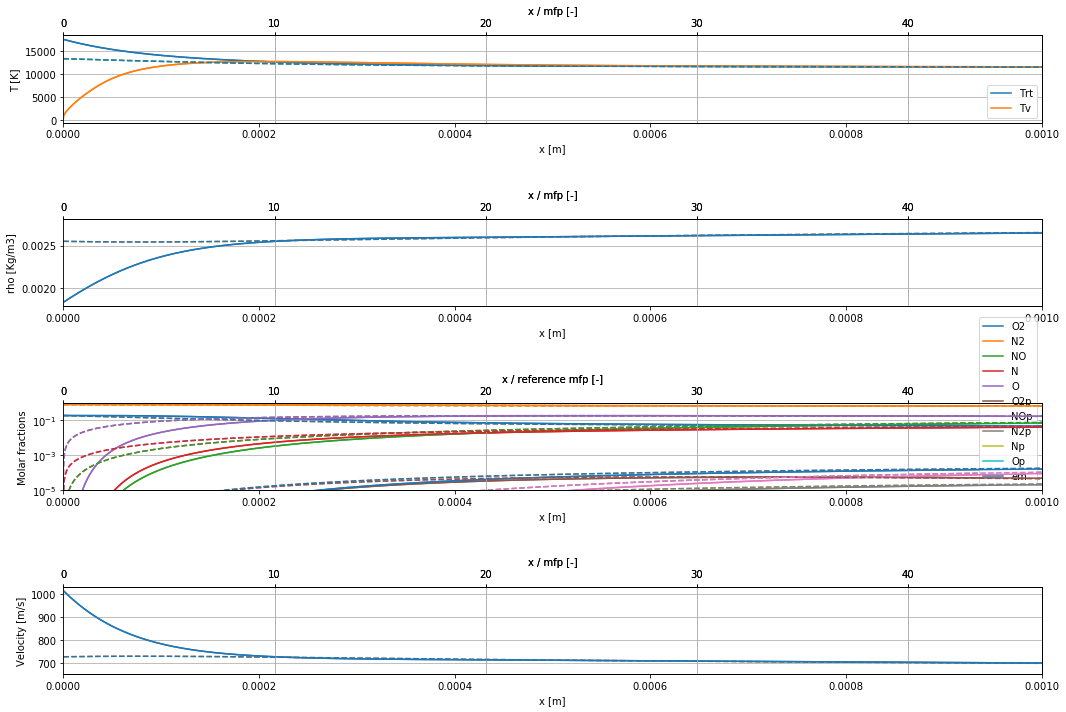

In [26]:
xmax = 1e-3
xmax_l = 3e7

fig, ax = plt.subplots(4, 1,)

_11specie_2T.plot_2T(ax[0], xmax = xmax)
_11specie_2T.plot_rho(ax[1], xmax = xmax)
_11specie_2T.logplot_X(ax[2], xmax = xmax)
_11specie_2T.plot_u(ax[3], xmax = xmax)

_11specie.plot_T(ax[0], xmax = xmax,ls = '--')
_11specie.plot_rho(ax[1], xmax = xmax,ls = '--')
_11specie.logplot_X(ax[2], xmax = xmax,ls = '--')
_11specie.plot_u(ax[3], xmax = xmax, ls = '--')

fig.tight_layout()

(0, 0.001)

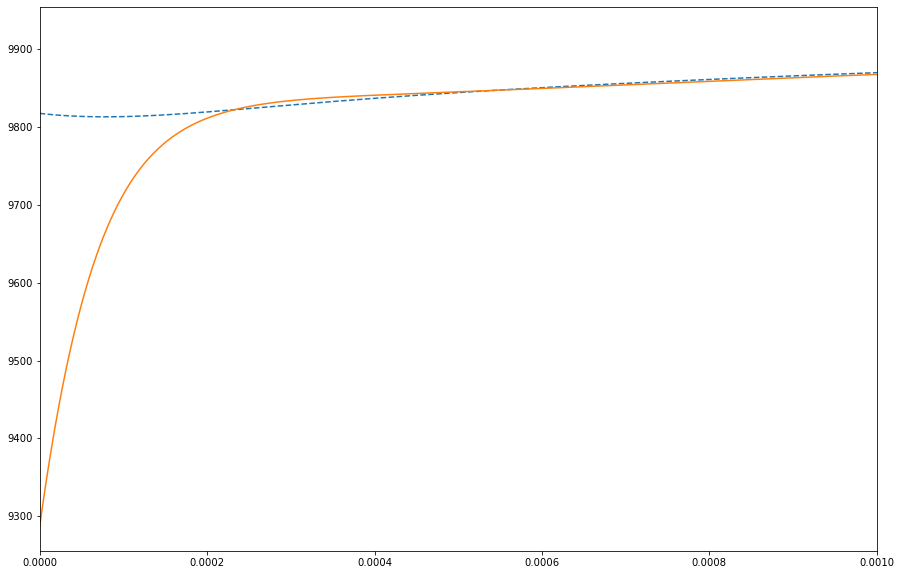

In [38]:
ax = plt.axes()
ax.plot(_11specie.sol_x, _11specie.sol_p,'--')
ax.plot(_11specie_2T.sol_x, _11specie_2T.sol_p)
ax.set_xlim(0, 1e-3)

The plot above represents the temperature, density, molar fractions and velocity of the flow. Dotted lines are the solution of the one-temperature model. <br>

The flow proprerties reach the equilibrium after less than 50 reference mean free paths. For the hypotesis made the vibrational-electronic temperature past the shock is the same as its pre-shock value. Since all the energy must be contained either in the kinetic energy term or in the rotational-translational degrees of freedom, the rotational-translational temperature and the velocity are higher than the unique temperature obtained by the one-temperature mixture model and its velocity. Then they all relax until they reach the equilibrium values that is the same of the one temperature model. <br>
While the roto-translational temperature favours heavy particle dissociations and exchange reactions, its contributions is overwhelmed by the lower density, which makes the two-temperature model slower to settle.

### Validate

The validation plots show that the flux of the conservative variables are constant up to a small tolerance for both misture models.

Maximum mass flux error       : 1.2743367155109934e-11
Maximum momentum flux error   : 1.8302061867015884e-11
Maximum enthalpy flux error   : 7.530491418568231e-06
Maximum mass frac error       : 8.053557820630886e-13
Last value of mass flux       : 1.858200000023658
Ymin                          : 0.0


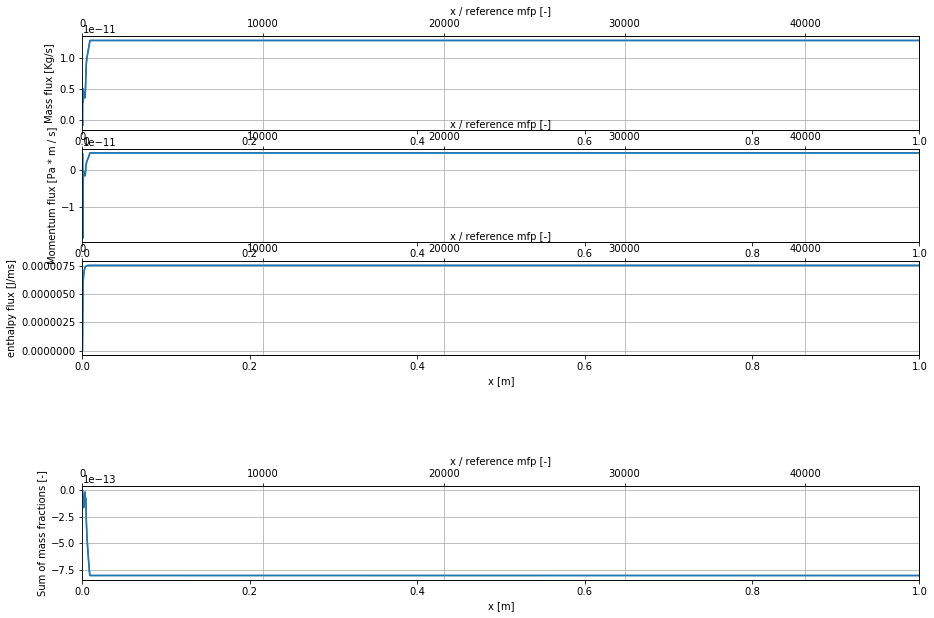

In [6]:
_11specie.validate()

Maximum mass flux error       : 3.36163008837126e-11
Maximum momentum flux error   : 3.3447399890898415e-11
Maximum energy flux error     : 5.468170935252123e-06
Maximum mass frac error       : 3.402833570476105e-13
Last value of mass flux       : 1.8582000000624601
Ymin                          : -3.8923675370333667e-72


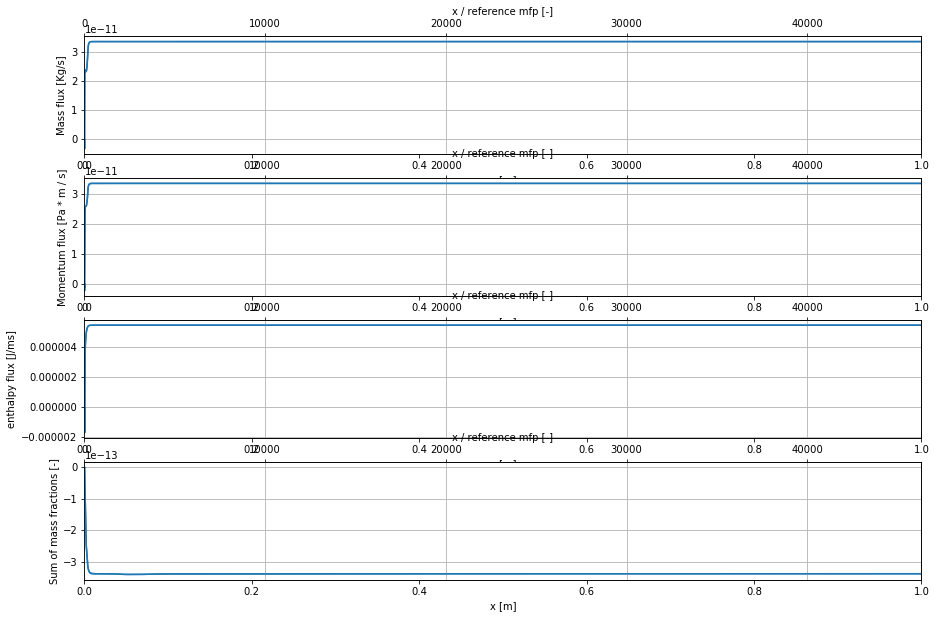

In [7]:
_11specie_2T.validate_2T()

### Queensland expansion tube [3]

In [42]:
_11specie_Q = cp.deepcopy(_11specie)
_11specie_Q.T0     = 2242
_11specie_Q.rho0   = 147/287.05/2242
_11specie_Q.u0     = 11.3*np.sqrt(1.4*287*2242)

_11specie_Q.solve_2T()
_11specie_Q.postprocess()

Pre shock Mach : 11.260044859663642
******************************
Post-shock guess values:
rho    : 0.0013184928800620583
T      : 57387.77872917684
Speed  : 1858.0080880741618
Mach   : 0.38556233671715295
******************************
Post-shock values:
rho    : 0.0013184928800620578
T      : 57387.77872917686
Tv     : 2242
Speed  : 1858.0080880741627
Mach   : 0.4070895015889073
******************************
Reference mean free path : 3.0014722563883104e-05



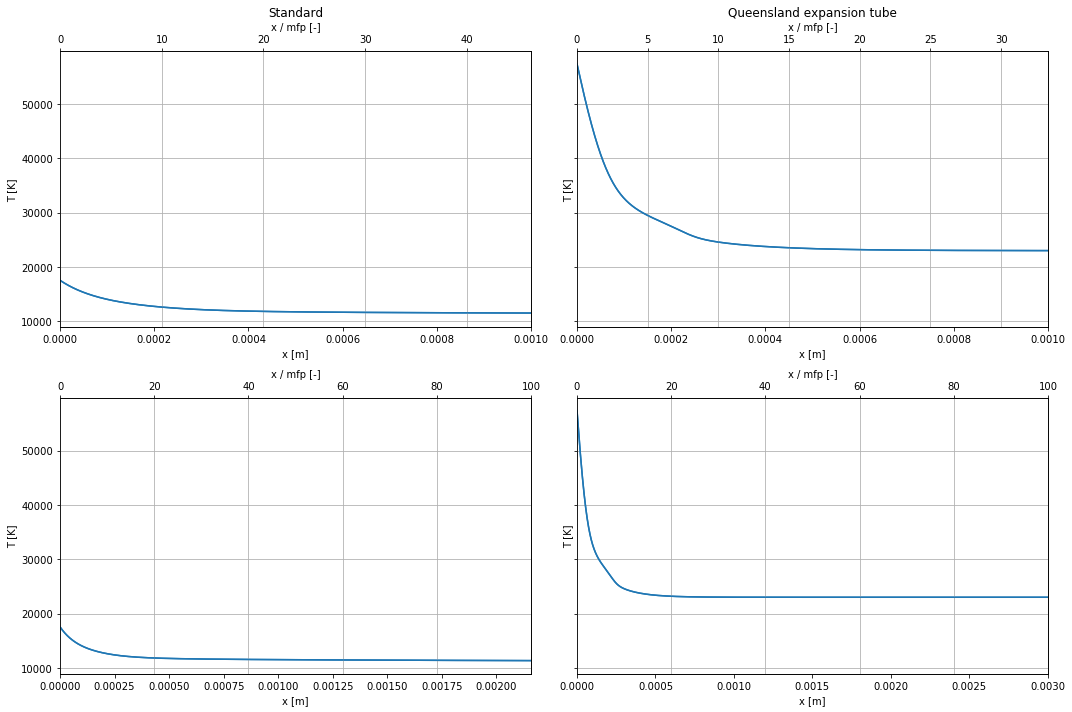

In [48]:
xmax = 1e-3
xmax_l = 1e2

fig, ax = plt.subplots(2,2, sharey = True)

_11specie_2T.plot_T(ax[0,0], xmax = xmax)
ax[0,0].set_title('Standard')

_11specie_Q.plot_T(ax[0,1], xmax = xmax)
ax[0, 1].set_title('Queensland expansion tube')

_11specie_2T.plot_T(ax[1,0], xmax_l = xmax_l)

_11specie_Q.plot_T(ax[1,1], xmax_l = xmax_l)

fig.tight_layout()

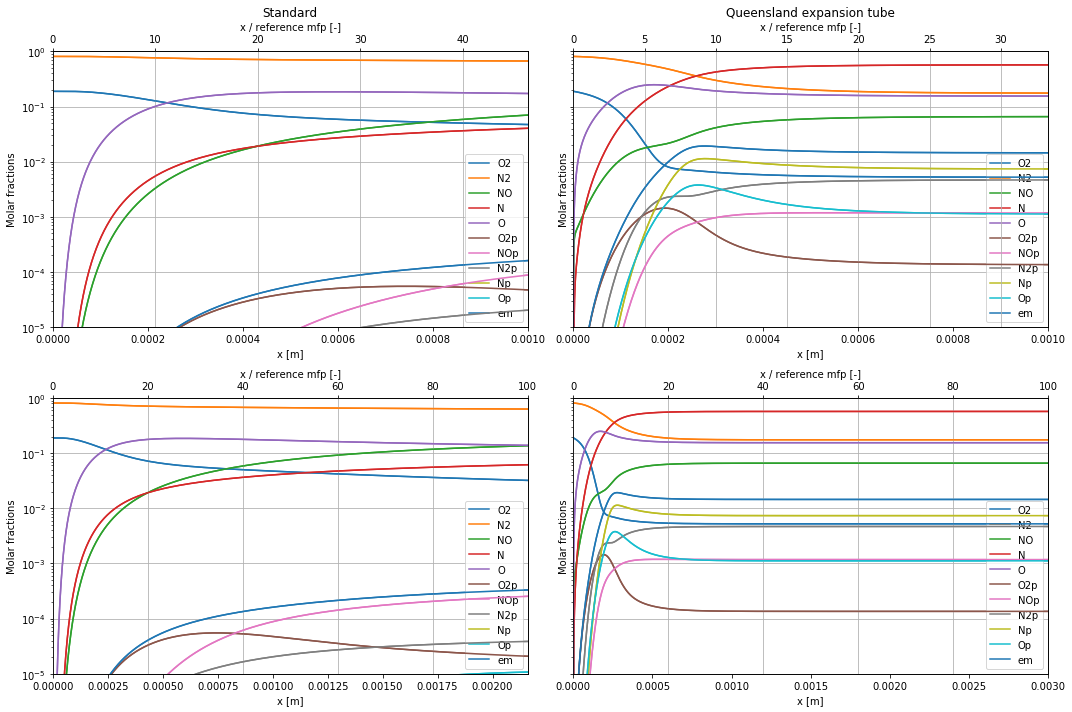

In [51]:
xmax = 1e-3
xmax_l = 1e2

fig, ax = plt.subplots(2,2, sharey = True)

_11specie_2T.logplot_X(ax[0,0], xmax = xmax)
ax[0,0].set_title('Standard')

_11specie_Q.logplot_X(ax[0,1], xmax = xmax)
ax[0, 1].set_title('Queensland expansion tube')

_11specie_2T.logplot_X(ax[1,0], xmax_l = xmax_l)

_11specie_Q.logplot_X(ax[1,1], xmax_l = xmax_l)

fig.tight_layout()

## 7 specie problem

The same problem is studied by 7 species model.

In [8]:
_7specie = problem()

# Add species 
_7specie.add_specie_ic(O2, 0.21)
_7specie.add_specie_ic(N2, 0.79)
_7specie.add_specie_ic(NO,  0.0)
_7specie.add_specie_ic(N,  0)
_7specie.add_specie_ic(O,  0)
_7specie.add_specie_ic(NOp,  0.0)
_7specie.add_specie_ic(em,  0.0)

# Add reactions
_7specie.reaction.append(O2diss_7s)
_7specie.reaction.append(N2diss_7s)
_7specie.reaction.append(NOdiss_7s)
_7specie.reaction.append(NO_O)
_7specie.reaction.append(O_N2)
_7specie.reaction.append(O___N)

# Set ic
_7specie.T0     = _11specie.T0     
_7specie.rho0   = _11specie.rho0 
_7specie.u0     = _11specie.u0

### 1 Temperature model

In [9]:
# Solve
_7specie.solve()
_7specie.postprocess()

Pre shock Mach : 18.977626837981823
******************************
Post-shock guess values:
rho    : 0.0018327556843828609
T      : 17531.821544944738
Speed  : 1013.883091911242
Mach   : 0.380654589983921
******************************
Post-shock values:
rho    : 0.002550900578885017
T      : 13315.518416899495
Tv     : 247.01999999999998
Speed  : 728.4486174730453
Mach   : 0.3385372185853052
******************************
Reference mean free path : 2.1592729644619046e-05



### 2 Temperature model

In [10]:
_7specie_2T = cp.deepcopy(_7specie)
_7specie_2T.solve_2T()
_7specie_2T.postprocess()

Pre shock Mach : 18.977626837981823
******************************
Post-shock guess values:
rho    : 0.0018327556843828609
T      : 17531.821544944738
Speed  : 1013.883091911242
Mach   : 0.380654589983921
******************************
Post-shock values:
rho    : 0.0018327556843828602
T      : 17531.82154494475
Tv     : 247.01999999999998
Speed  : 1013.8830919112426
Mach   : 0.4200041813142019
******************************
Reference mean free path : 2.1592729644619046e-05



### Plot

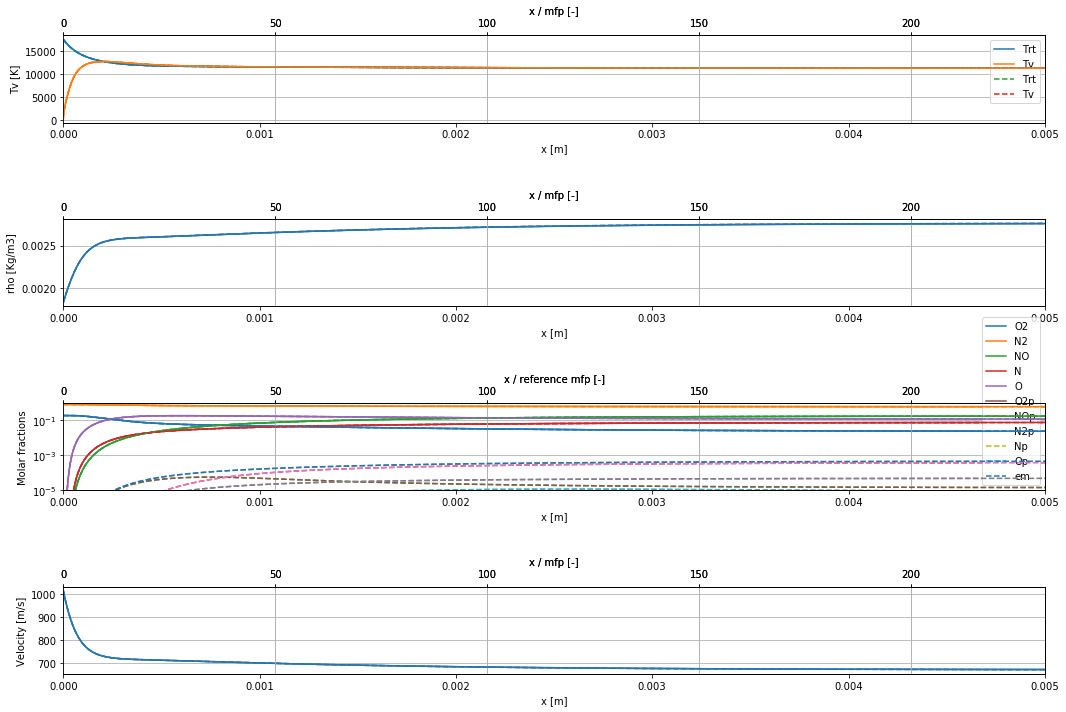

In [41]:
xmax = 5e-3
xmax_l = 3e7

fig, ax = plt.subplots(4, 1,)

_7specie_2T.plot_2T(ax[0], xmax = xmax)
_7specie_2T.plot_rho(ax[1], xmax = xmax)
_7specie_2T.logplot_X(ax[2], xmax = xmax)
_7specie_2T.plot_u(ax[3], xmax = xmax)

_11specie_2T.plot_2T(ax[0], xmax = xmax,ls = '--')
_11specie_2T.plot_rho(ax[1], xmax = xmax,ls = '--')
_11specie_2T.logplot_X(ax[2], xmax = xmax,ls = '--')
_11specie_2T.plot_u(ax[3], xmax = xmax, ls = '--')

fig.tight_layout()

For the condition considered there is no remarkable difference but in the molar fractions, where small amounts of ionized molecules are produced.

### Queensland expansion tube [3]

In [44]:
_7specie_Q = cp.deepcopy(_7specie)
_7specie_Q.T0     = 2242
_7specie_Q.rho0   = 147/287.05/2242
_7specie_Q.u0     = 11.3*np.sqrt(1.4*287*2242)

_7specie_Q.solve_2T()
_7specie_Q.postprocess()

Pre shock Mach : 11.260044859663642
******************************
Post-shock guess values:
rho    : 0.0013184928800620583
T      : 57387.77872917684
Speed  : 1858.0080880741618
Mach   : 0.38556233671715295
******************************
Post-shock values:
rho    : 0.0013184928800620578
T      : 57387.77872917686
Tv     : 2242
Speed  : 1858.0080880741627
Mach   : 0.4070895015889073
******************************
Reference mean free path : 3.0014722563883104e-05



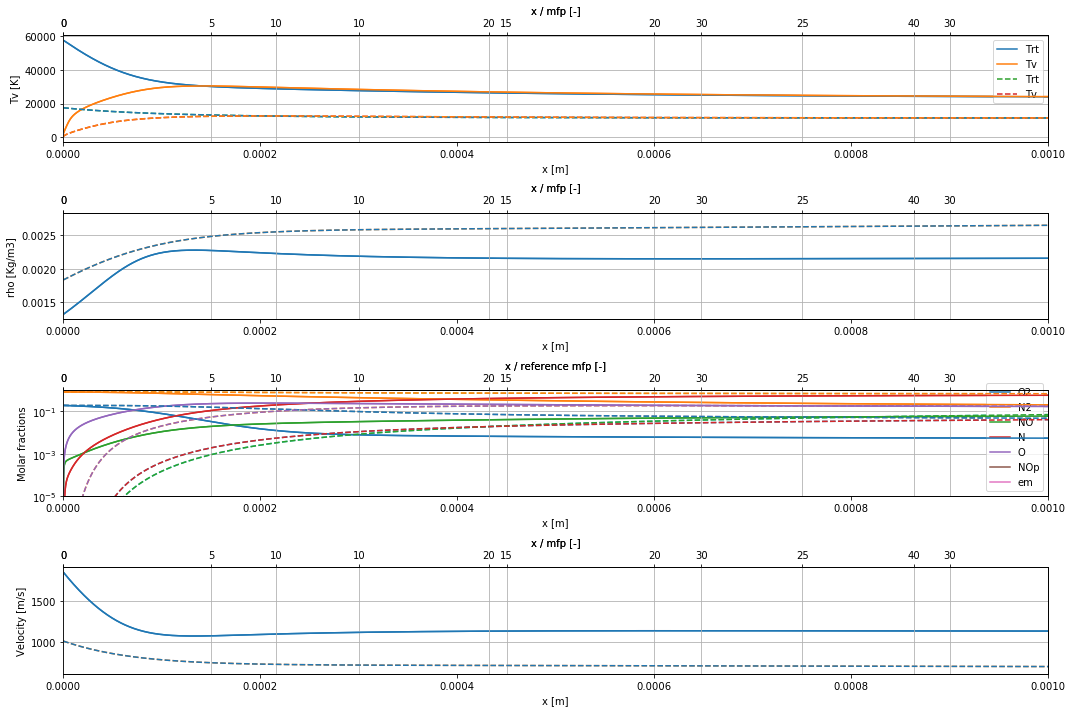

In [45]:
xmax = 1e-3
xmax_l = 3e7

fig, ax = plt.subplots(4, 1,)

_7specie_Q.plot_2T(ax[0], xmax = xmax)
_7specie_Q.plot_rho(ax[1], xmax = xmax)
_7specie_Q.logplot_X(ax[2], xmax = xmax)
_7specie_Q.plot_u(ax[3], xmax = xmax)

_7specie_2T.plot_2T(ax[0], xmax = xmax,ls = '--')
_7specie_2T.plot_rho(ax[1], xmax = xmax,ls = '--')
_7specie_2T.logplot_X(ax[2], xmax = xmax,ls = '--')
_7specie_2T.plot_u(ax[3], xmax = xmax, ls = '--')

fig.tight_layout()

## Effect of altitude (density)

In [24]:
low_altitude = cp.deepcopy(_11specie)
low_altitude.rho0 = 100 * _11specie.rho0
low_altitude.solve()
low_altitude.postprocess()

Pre shock Mach : 18.977626837981823
******************************
Post-shock guess values:
rho    : 0.1832755684382861
T      : 17531.821544944738
Speed  : 1013.883091911242
Mach   : 0.380654589983921
******************************
Post-shock values:
rho    : 0.2550900578885041
T      : 13315.518416899497
Tv     : 247.01999999999998
Speed  : 728.4486174730455
Mach   : 0.33853721858530533
******************************
Reference mean free path : 2.1592729644619045e-07



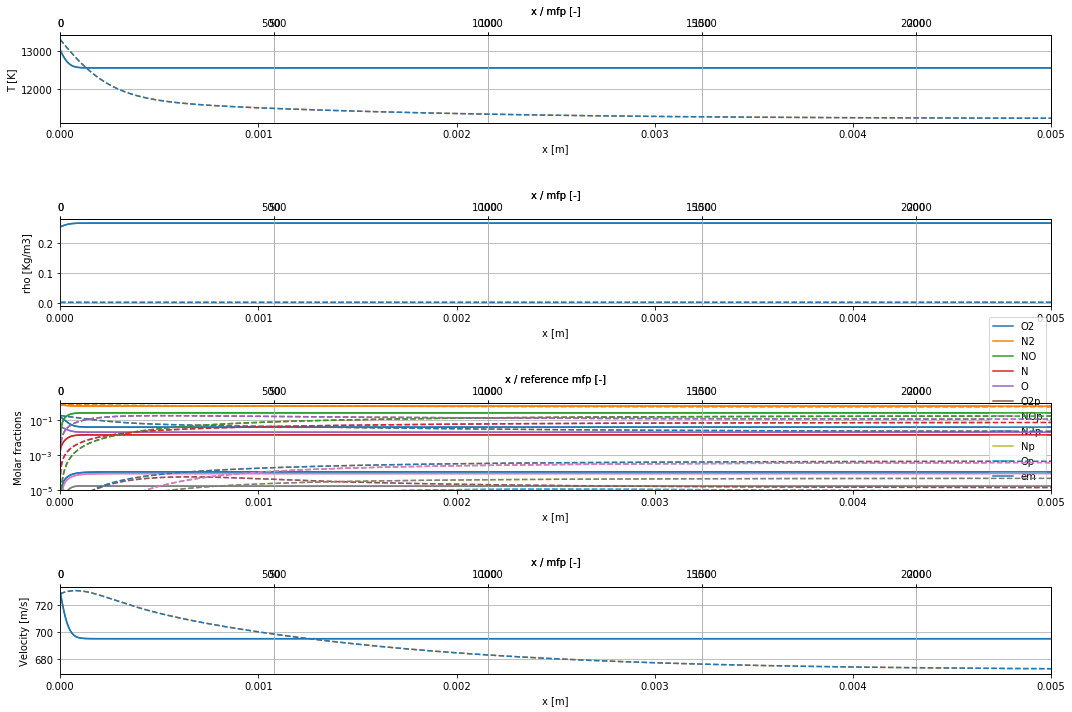

In [25]:
xmax = 5e-3
xmax_l = 3e7

fig, ax = plt.subplots(4, 1,)

low_altitude.plot_T(ax[0], xmax = xmax)
low_altitude.plot_rho(ax[1], xmax = xmax)
low_altitude.logplot_X(ax[2], xmax = xmax)
low_altitude.plot_u(ax[3], xmax = xmax)

_11specie.plot_T(ax[0], xmax = xmax,ls = '--')
_11specie.plot_rho(ax[1], xmax = xmax,ls = '--')
_11specie.logplot_X(ax[2], xmax = xmax,ls = '--')
_11specie.plot_u(ax[3], xmax = xmax, ls = '--')

fig.tight_layout()

While the effect of a different mixture model can be compared in the same spatial coordinates, increasing at different altitudes (densities) the post-shock conditions are different and in particular the mean free path, thus the relaxation length, is significantly reduced. However, the number of mean free path that lead to relaxation is expected to be the same, hence a more appropriate spatial coordinate to compare the results in the distance measured as number of reference mean free path.

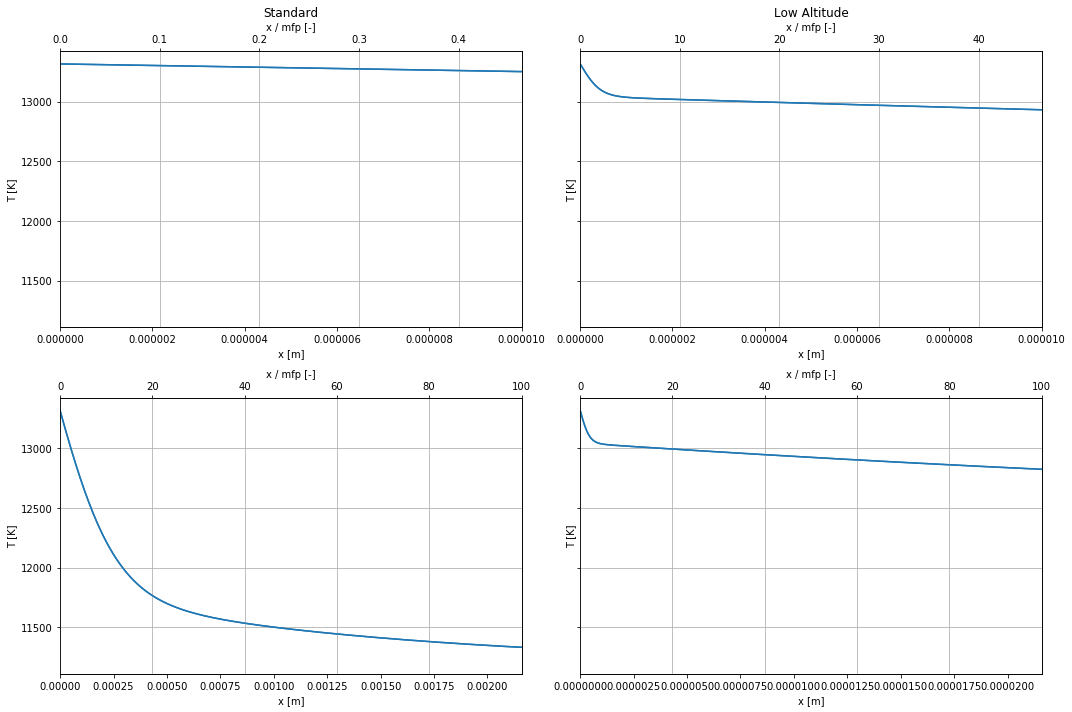

In [16]:
xmax = 1e-5
xmax_l = 1e2

fig, ax = plt.subplots(2,2, sharey = True)

_11specie.plot_T(ax[0,0], xmax = xmax)
ax[0,0].set_title('Standard')

low_altitude.plot_T(ax[0,1], xmax = xmax)
ax[0, 1].set_title('Low Altitude')

_11specie.plot_T(ax[1,0], xmax_l = xmax_l)

low_altitude.plot_T(ax[1,1], xmax_l = xmax_l)

fig.tight_layout()

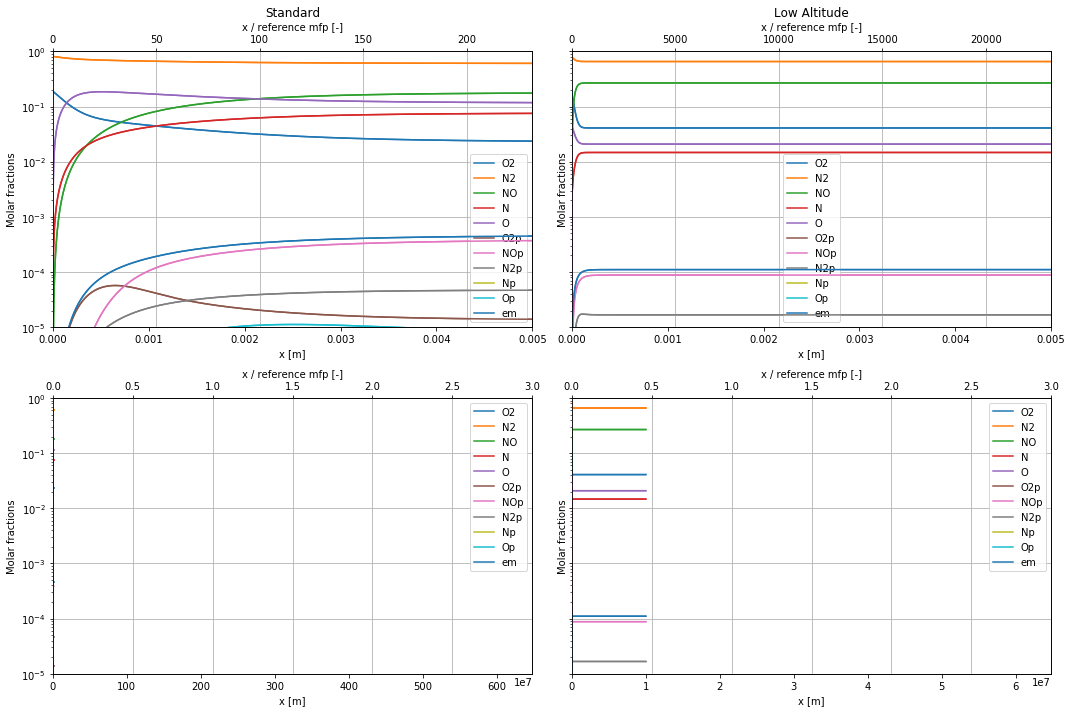

In [19]:
fig, ax = plt.subplots(2,2, sharey = True)

_11specie.logplot_X(ax[0,0], xmax = xmax)
ax[0,0].set_title('Standard')

low_altitude.logplot_X(ax[0,1], xmax = xmax)
ax[0, 1].set_title('Low Altitude')

_11specie.logplot_X(ax[1,0], xmax_l = xmax_l)

low_altitude.logplot_X(ax[1,1], xmax_l = xmax_l)

fig.tight_layout()

## Effect of temperature

The post-shock temperature depends mainly on the pre-shock Mach number since the pre-shock thermal energy is much smaller than the kinetic energy of the flow in hypersonic flows, thus the effect of temperature is insignificant but for the relaxation length of the vibrational temperature in the 2 temperature model and the reactions that depend strongly on that temperature such as electron impacts.

In [14]:
low_T = cp.deepcopy(_11specie_2T)
low_T.T0 = _11specie.T0 / 2
low_T.solve_2T()
low_T.postprocess()

Pre shock Mach : 26.838417255929528
******************************
Post-shock guess values:
rho    : 0.001845390139540331
T      : 17415.24465747315
Speed  : 1006.941545955621
Mach   : 0.379311649508821
******************************
Post-shock values:
rho    : 0.0018453901395403302
T      : 17415.244657473162
Tv     : 123.50999999999999
Speed  : 1006.9415459556213
Mach   : 0.41836628064371406
******************************
Reference mean free path : 2.144489511977963e-05



/home/umberto/Università/Hypersonic/Project/Git/Reactive_shock_air/Book_mod_by_me/Results/Reactive_Air_shock_2T_last.py:433: RuntimeWarning: invalid value encountered in sqrt
  Z = 10000 / np.sqrt(T * Tv)
/home/umberto/Università/Hypersonic/Project/Git/Reactive_shock_air/Book_mod_by_me/Results/Reactive_Air_shock_2T_last.py:405: RuntimeWarning: invalid value encountered in double_scalars
  kf_2T = self.Cf * Tv ** self.nf * np.exp(-self.th_d / Tv)
/home/umberto/Università/Hypersonic/Project/Git/Reactive_shock_air/Book_mod_by_me/Results/Reactive_Air_shock_2T_last.py:402: RuntimeWarning: invalid value encountered in double_scalars
  kf_2T = self.Cf * Tv ** self.nf * np.exp(-self.th_d / Tv)


/home/umberto/Università/Hypersonic/Project/Git/Reactive_shock_air/Book_mod_by_me/Results/Reactive_Air_shock_2T_last.py:412: RuntimeWarning: invalid value encountered in double_scalars
  kf_2T = self.Cf * T ** self.nf * np.exp(-self.th_d / Tv - 1 + T / Tv)
/home/umberto/Università/Hypersonic/Project/Git/Reactive_shock_air/Book_mod_by_me/Results/Reactive_Air_shock_2T_last.py:409: RuntimeWarning: invalid value encountered in double_scalars
  kf_2T = self.Cf * T ** self.nf * np.exp(-self.th_d / T)
/home/umberto/Università/Hypersonic/Project/Git/Reactive_shock_air/Book_mod_by_me/Results/Reactive_Air_shock_2T_last.py:1240: RuntimeWarning: invalid value encountered in double_scalars
  tau_sr = 101325 / p * np.exp(A_sr * (T**(-1/3) - B_sr) - 18.42)


/home/umberto/Università/Hypersonic/Project/Git/Reactive_shock_air/Book_mod_by_me/Results/Reactive_Air_shock_2T_last.py:187: RuntimeWarning: overflow encountered in exp
  Z  = np.sum(self.electro_g * np.exp(-self.electro_th/Tv))
/home/umberto/Università/Hypersonic/Project/Git/Reactive_shock_air/Book_mod_by_me/Results/Reactive_Air_shock_2T_last.py:189: RuntimeWarning: overflow encountered in exp
  Z1 = np.sum(self.electro_g * np.exp(-self.electro_th/Tv) * self.electro_th)
/home/umberto/Università/Hypersonic/Project/Git/Reactive_shock_air/Book_mod_by_me/Results/Reactive_Air_shock_2T_last.py:191: RuntimeWarning: overflow encountered in exp
  Z2 = np.sum(self.electro_g * np.exp(-self.electro_th/Tv) * self.electro_th**2)
/home/umberto/Università/Hypersonic/Project/Git/Reactive_shock_air/Book_mod_by_me/Results/Reactive_Air_shock_2T_last.py:193: RuntimeWarning: invalid value encountered in double_scalars
  e_ele  = self.R * Z1 / Z - self.R * Z10 / Z0
/home/umberto/Università/Hypersonic/Projec

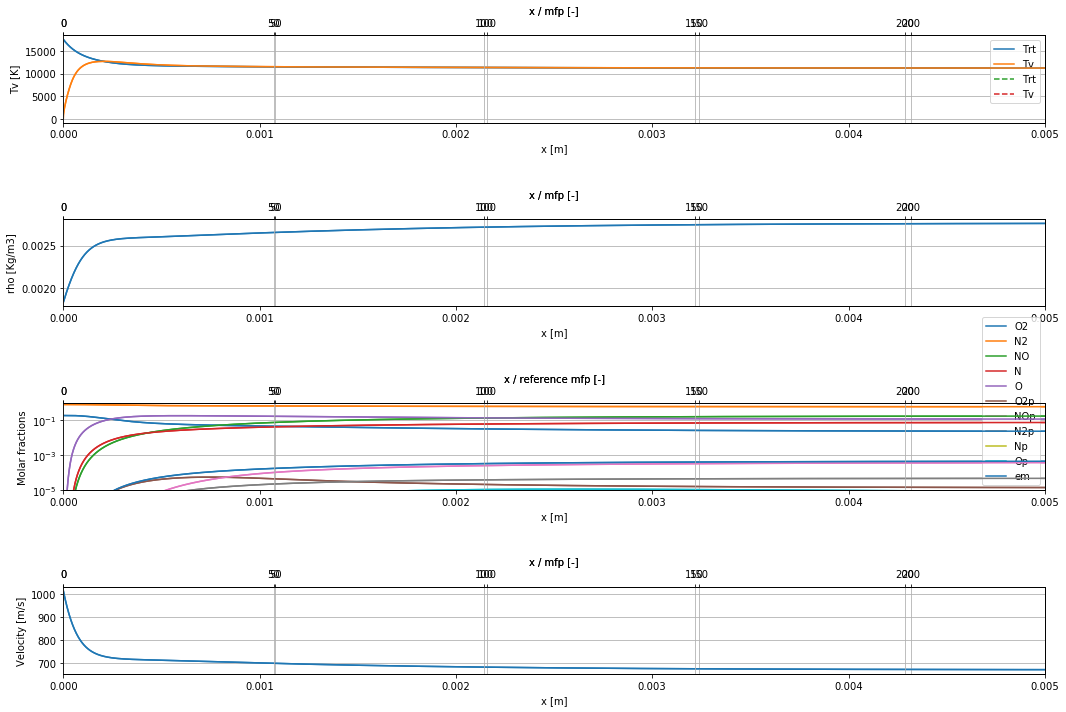

In [15]:
xmax = 5e-3
xmax_l = 3e7

fig, ax = plt.subplots(4, 1,)

_11specie_2T.plot_2T(ax[0], xmax = xmax)
_11specie_2T.plot_rho(ax[1], xmax = xmax)
_11specie_2T.logplot_X(ax[2], xmax = xmax)
_11specie_2T.plot_u(ax[3], xmax = xmax)

low_T.plot_2T(ax[0], xmax = xmax,ls = '--')
low_T.plot_rho(ax[1], xmax = xmax,ls = '--')
low_T.logplot_X(ax[2], xmax = xmax,ls = '--')
low_T.plot_u(ax[3], xmax = xmax, ls = '--')

fig.tight_layout()